## Linear Regression
In Chapter 1, we looked at a simple regression model of life satisfaction: 

	life_satisfaction = θ0 + θ1 × GDP_per_capita.
    
This model is just a linear function of the input feature GDP_per_capita. θ0 and θ1 are
the model’s parameters.

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term), as shown in Equation 4-1.

	Equation 4-1. Linear Regression model prediction
	y = θ0 + θ1x1 + θ2x2 + ⋯ + θnxn
    	
	• ŷ is the predicted value.

    • n is the number of features.
    
    • xi is the ith feature value.
    
    • θj is the jth model parameter (including the bias term θ0 and the feature weights
    θ1, θ2, ⋯, θn).

This can be written much more concisely using a vectorized form, as shown in Equation 4-2.

    Equation 4-2. Linear Regression model prediction (vectorized form)
    y = hθ x = θ · x
    
    • θ is the model’s parameter vector, containing the bias term θ0 and the feature
    weights θ1 to θn.
    
    • x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.
    
    • θ · x is the dot product of the vectors θ and x, which is of course equal to θ0x0 + θ1x1 + 		θ2x2 + ⋯ + θnxn.
    
    • hθ is the hypothesis function, using the model parameters θ.

    ------------------------------ General Note ------------------------------------------
    
In Machine Learning, vectors are often represented as column vectors, which are 2D arrays with a single column. If θ and x are column vectors, then the prediction is: y = θTx, where θT is the transpose of θ (a row vector instead of a column vector) and θTx is the matrix multiplication of θT and x. It is of course the same prediction, except it is now represented as a single cell matrix rather than a scalar value. In this book we will use this notation to avoid switching between dot products and matrix multiplications.
   
    --------------------------------------------------------------------------------------

Okay, that’s the Linear Regression model, so now how do we train it? Well, recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. In Chapter 2 we saw that the most common performance measure of a regression model is the Root Mean Square Error (RMSE) (Equation 2-1). Therefore, to train a Linear Regression model, you need to find the value of θ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).



### The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution - in other words, a mathematical equation that gives the result directly. This is called the Normal Equation.

    • θ is the value of θ that minimizes the cost function.
    
    • y is the vector of target values containing y(1) to y(m).
    
Let’s generate some linear-looking data to test this equation on (Figure 4-1):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Now let’s compute θ using the Normal Equation. We will use the inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

	----------------------- OBS ------------------------------
linalg.inv(a)[source]
Compute the (multiplicative) inverse of a matrix.

Given a square matrix a, return the matrix ainv satisfying dot(a, ainv) = dot(ainv, a) = eye(a.shape[0]).

Parameters:
a(…, M, M) array_like
Matrix to be inverted.

Returns:
ainv(…, M, M) ndarray or matrix
(Multiplicative) inverse of the matrix a.

Raises:
LinAlgError
If a is not square or inversion fails.

Ex.:

a = np.array([[[1., 2.], [3., 4.]], [[1, 3], [3, 5]]])
inv(a)

	array([[[-2.  ,  1.  ],

        [ 1.5 , -0.5 ]],
        
       [[-1.25,  0.75],
       
        [ 0.75, -0.25]]])

    ----------------------- OBS ------------------------------
numpy.c_ = <numpy.lib.index_tricks.CClass object>

Translates slice objects to concatenation along the second axis.

This is short-hand for np.r_['-1,2,0', index expression], which is useful because of its common occurrence. In particular, arrays will be stacked along their last axis after being upgraded to at least 2-D with 1’s post-pended to the shape (column vectors made out of 1-D arrays).

Ex.:

np.c_[np.array([1,2,3]), np.array([4,5,6])]
	
    array([[1, 4],
    
       [2, 5],
       
       [3, 6]])
       
       
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
	
    array([[1, 2, 3, ..., 4, 5, 6]])
    


The actual function that we used to generate the data is y = 4 + 3x(1) + Gaussian noise. Let’s see what the equation found:

In [4]:
theta_best

array([[4.40520038],
       [2.6349916 ]])

We would have hoped for θ0 = 4 and θ1 = 3 instead of the ones we saw above. Close enough, but the noise made it impossible to recover the exact parameters of the original function. Now you can make predictions using θ:

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.40520038],
       [9.67518357]])

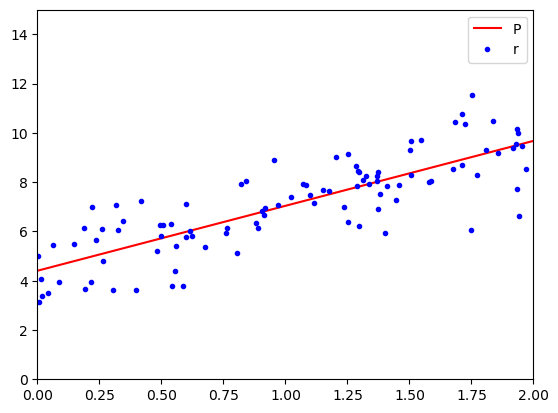

In [6]:
#Let’s plot this model’s predictions:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend('Predictions')
plt.show()

In [7]:
#Performing linear regression using Scikit-Learn is quite simple:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.40520038]), array([[2.6349916]]))

In [8]:
lin_reg.predict(X_new)

array([[4.40520038],
       [9.67518357]])

In [9]:
'''
The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly:
'''
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.40520038],
       [2.6349916 ]])

## Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is t tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

Concretely, you start by filling θ with random values (this is called random initialization), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum (see Figure 4-3).

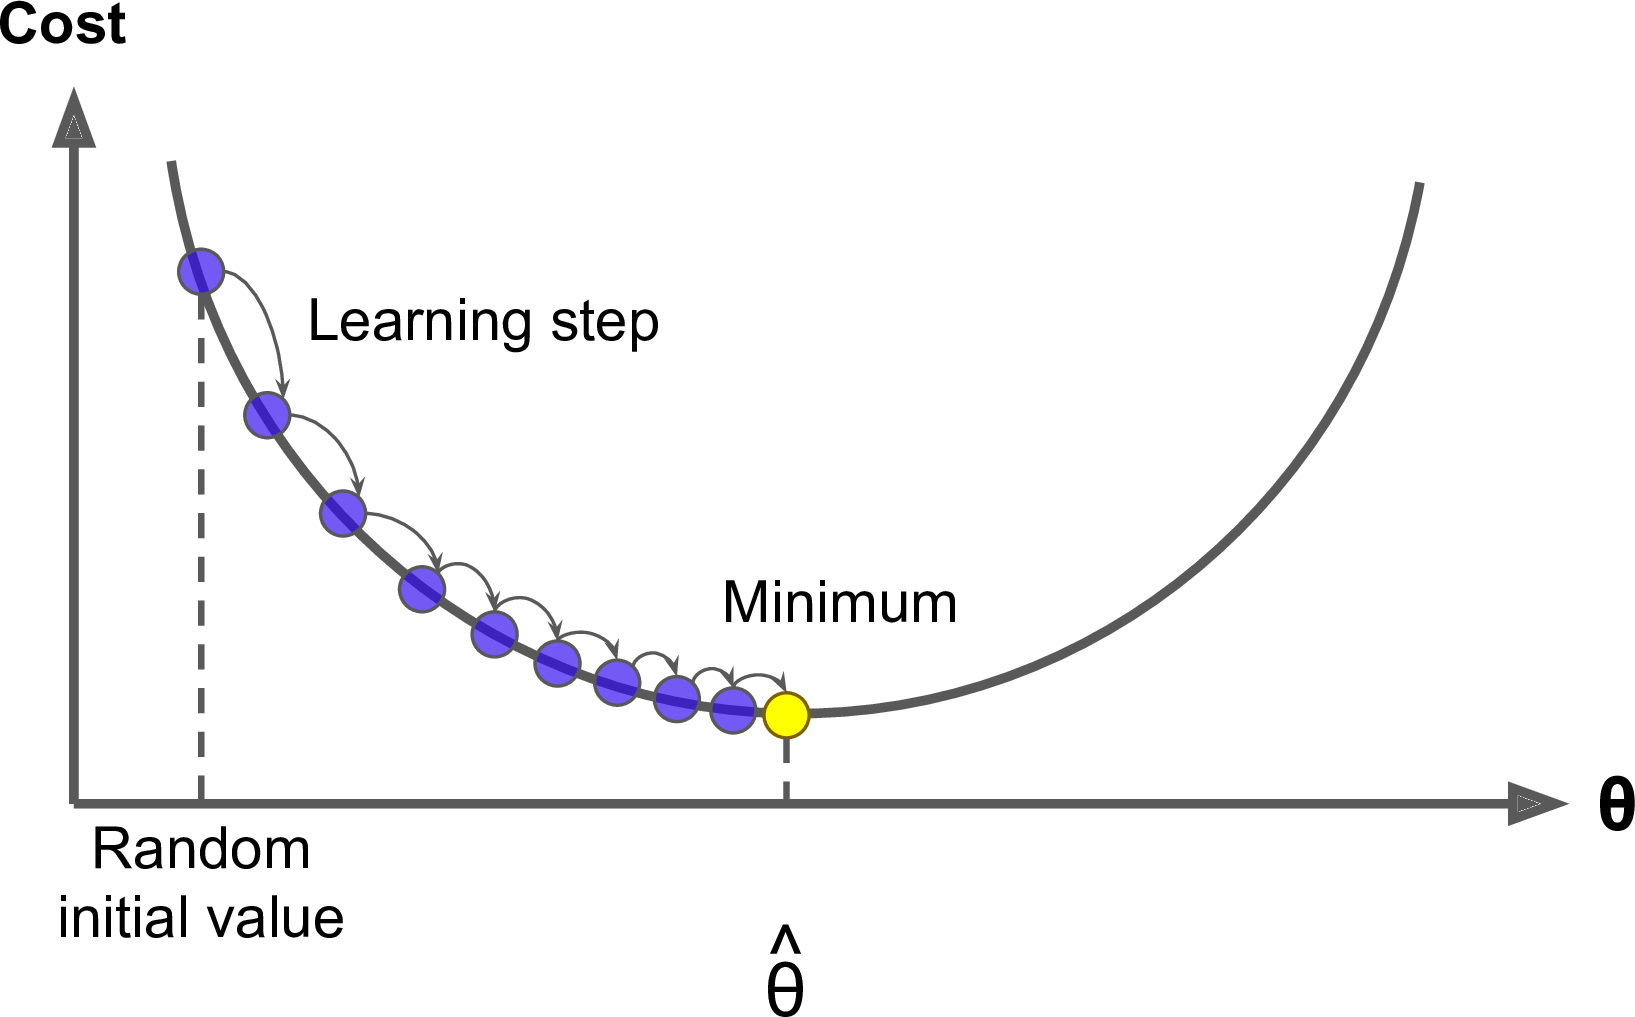

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time (see Figure 4-4).

<img src='LR small.png' style='width:500px;height:350px'/>

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution (see Figure 4-5).

<img src='LR large.png' style='width:500px;height:350px'/>

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult. Figure 4-6 shows the two main challenges with Gradient Descent: if the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum.

<img src='Gradient Descent pitfalls.png' style='width:500px;height:350px'/>

Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly.4 These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. Figure 4-7 shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

<img src='Gradient Descent with and without feature scaling.png' style='width:700px;height:250px'/>

As you can see, on the left the Gradient Descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time.

    ---------------------------- CAUTION --------------------------------

When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

    ---------------------------------------------------------------------

This diagram also illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is a search in the model’s parameter space: the more parameters a model has, the more dimensions this space has, and the harder the search is: searching for a needle in a 300-dimensional haystack is much trickier than in three dimensions. Fortunately, since the cost function is convex in the case of Linear Regression, the needle is simply at the bottom of the bowl.

### Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter θj. In other words, you need to calculate how much the cost function will change if you change θj just a little bit. This is called a partial derivative. It is like asking “what is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions). Equation 4-5 computes the partial derivative of the cost function with regards to parameter θj, noted ∂/∂θj MSE(θ).

Instead of computing these partial derivatives individually, you can use Equation 4-6 to compute them all in one go. The gradient vector, noted ∇θMSE(θ), contains all the partial derivatives of the cost function (one for each model parameter).



    ------------------------- CAUTION -----------------------------------
    
Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.
    
    ---------------------------------------------------------------------

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting ∇θMSE(θ) from θ. This is where the learning rate η comes into play:6 multiply the gradient vector by η to determine the size of the downhill step.

In [12]:
#Let’s look at a quick implementation of this algorithm:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [13]:
#That wasn’t too hard! Let’s look at the resulting theta:
theta

array([[4.40520038],
       [2.6349916 ]])

Hey, that’s exactly what the Normal Equation found! Gradient Descent worked perfectly. But what if you had used a different learning rate eta? Figure 4-8 shows the first 10 steps of Gradient Descent using three different learning rates (the dashed line represents the starting point).

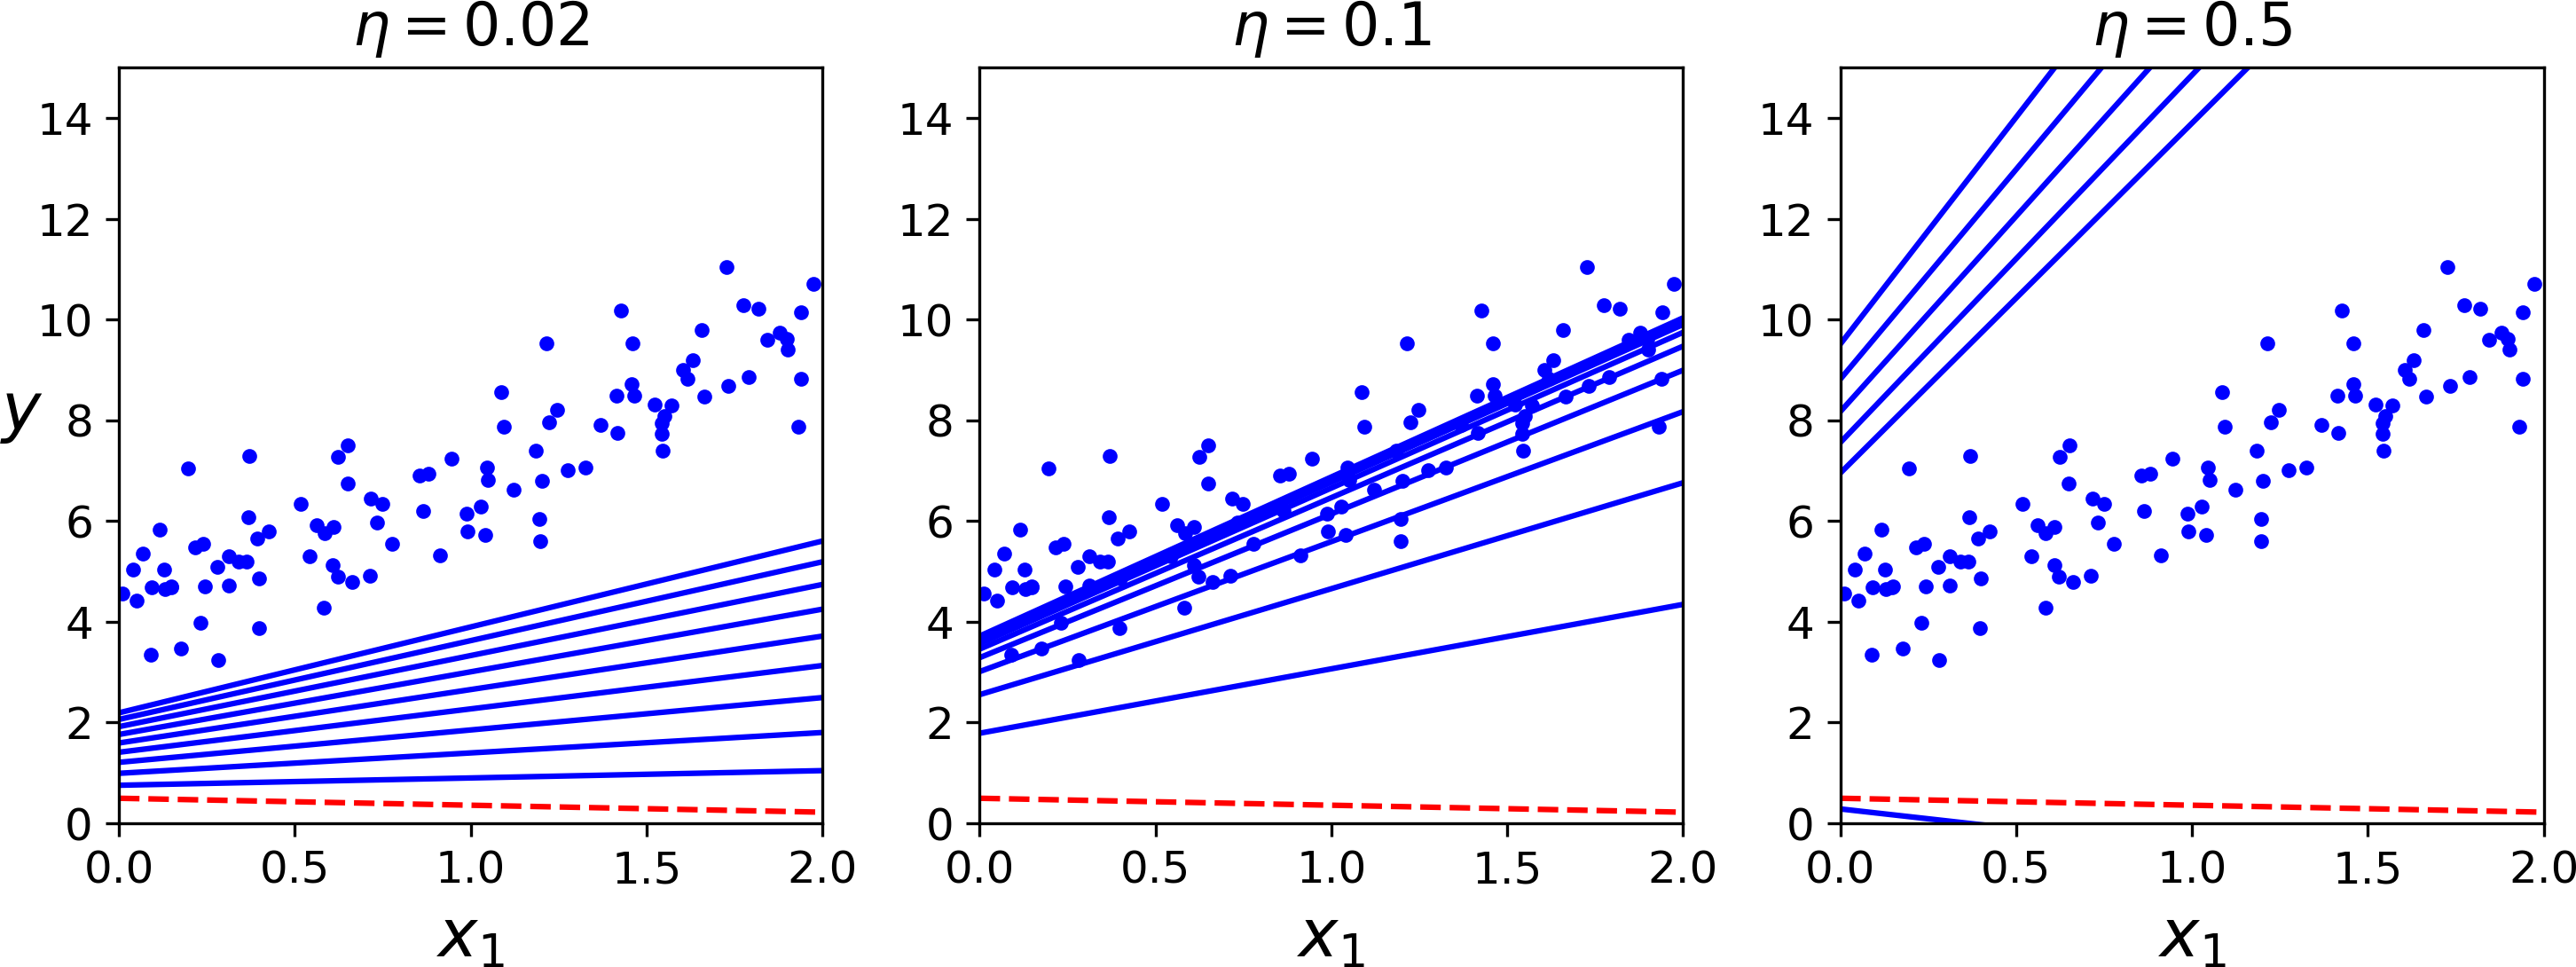

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step. To find a good learning rate, you can use grid search (see Chapter 2). However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when Gradient Descent has (almost) reached the minimum.

	--------------------- Convergence Rate -------------------------------------

When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take O(1/ϵ) iterations to reach the optimum within a range of ϵ depending on the shape of the cost function. If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer.

	-----------------------------------------------------------------------------

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.)

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down (see Figure 4-9). So once the algorithm stops, the final parameter values are good, but not optimal.

<img src='Stochastic Gradient Descent.png' style='width:300px;height:200px'/>

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to simulated annealing, an algorithm inspired from the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

In [14]:
#This code implements Stochastic Gradient Descent using a simple learning schedule:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

By convention we iterate by rounds of m iterations; each round is called an epoch. While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a fairly good solution:

In [15]:
theta

array([[4.49669861],
       [2.55865013]])

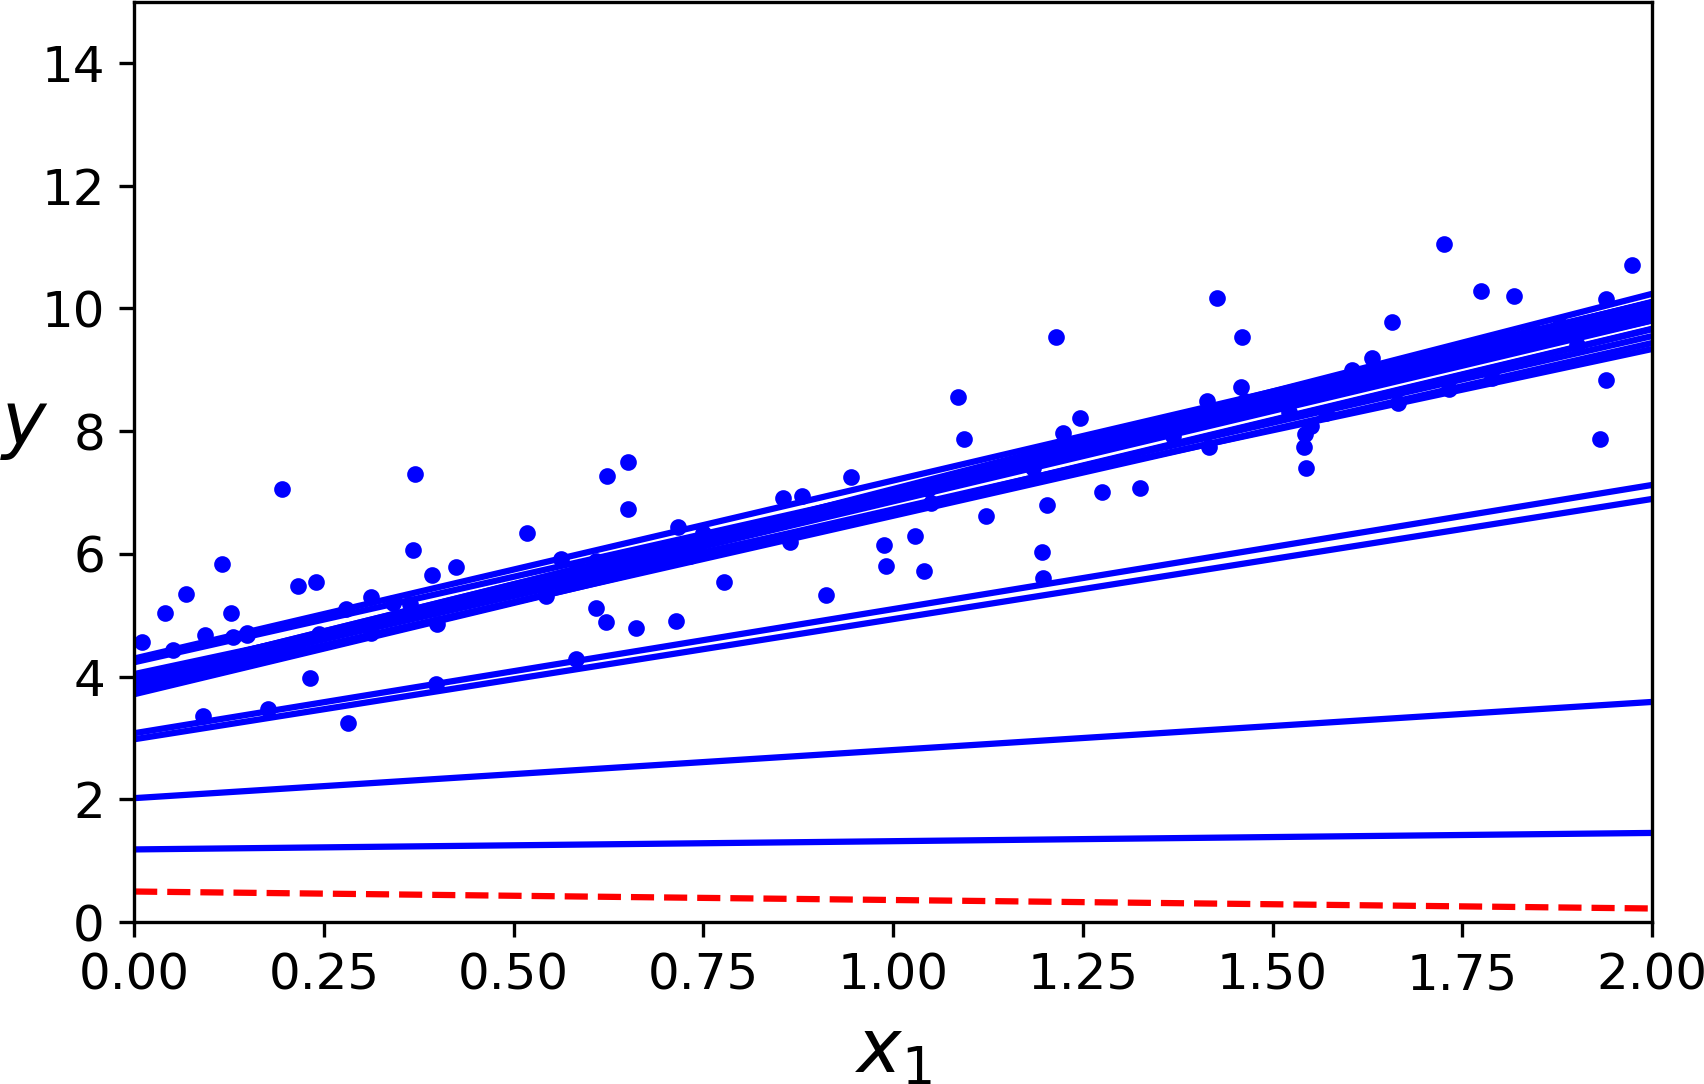

Note that since instances are picked randomly, some instances may be picked several times per epoch while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set (making sure to shuffle the input features and the labels jointly), then go through it instance by instance, then shuffle it again, and so on. However, this generally converges more slowly.

    ------------------------- CAUTION -----------------------------------

When using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID), to ensure that the parameters get pulled towards the global optimum, on average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not do this, for example if the instances are sorted by label, then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.
    
    ---------------------------------------------------------------------

To perform <i>Linear Regression</i> using <i>SGD</i> with Scikit-Learn, you can use the **<i>SGDRe gressor class</i>**, which defaults to optimizing the squared error cost function. The following code runs for maximum 1000 epochs (max_iter=1000) or until the loss drops by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one), and it does not use any regularization (penalty=None; more details on this shortly):

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
#Once again, you find a solution quite close to the one returned by the Normal Equation:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.34614994]), array([2.60480706]))

### Mini-batch Gradient Descent

The last Gradient Descent algorithm we will look at is called Mini-batch Gradient Descent. It is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called minibatches. <u>The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially
when using GPUs</u>.

The algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike Linear Regression as we saw earlier). Figure 4-11 shows the paths taken by the three Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the
minimum, while both Stochastic GD and Mini-batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

<img src='Gradient Descent paths in parameter space.png' style='width:300px;height:250px'/>

Let’s compare the algorithms we’ve discussed so far for Linear Regression8 (recall that <i>m</i> is the number of training instances and n is the number of features); see Table 4-1.

<img src='Comparison of algorithms for Linear Regression.jpg' style='width:800px;height:250px'/>

    ------------------------------ General Note ------------------------------------------
    
There is almost no difference after training: all these algorithms end up with very similar models and make predictions in exactly the same way.

P.S.:While the Normal Equation can only perform Linear Regression, the Gradient Descent algorithms can be used to train many other models, as we will see.

    --------------------------------------------------------------------------------------

## Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression. Let’s look at an example. First, let’s generate some nonlinear data, based on a simple quadratic equation:

In [30]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

<img src='Generated nonlinear and noisy dataset.png' style='width:800px;height:350px'/>

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s <i>PolynomialFeatures </i> class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.26927294])

In [32]:
X_poly[0]

array([-2.26927294,  5.1495997 ])

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a <i>LinearRegression</i> model to this extended training data (Figure 4-13):

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.03000645]), array([[1.08179542, 0.47676066]]))

<img src='Polynomial Regression model predictions.png' style='width:800px;height:350px'/>

Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree. For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the features a2, a3, b2, and b3, but also the combinations ab, a2b, and ab2.

PolynomialFeatures(degree=d) transforms an array containing n
features into an array containing [(n + d) !/d! n!] features, where n! is the
factorial of n, equal to 1 × 2 × 3 × ⋯ × n. Beware of the combinatorial
explosion of the number of features!

## Learning Curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. For example, Figure 4-14 applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (2nd-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

<img src='High-degree Polynomial Regression.png' style='width:800px;height:350px'/>

Of course, this high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model. It makes sense since the data was generated using a quadratic model, but in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

In Chapter 2 you used cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

Another way is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, simply train the model several times on different sized subsets of the training set. The following code defines a function that plots the learning curves of a model given some training data:

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors = list()
    val_errors = list()
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

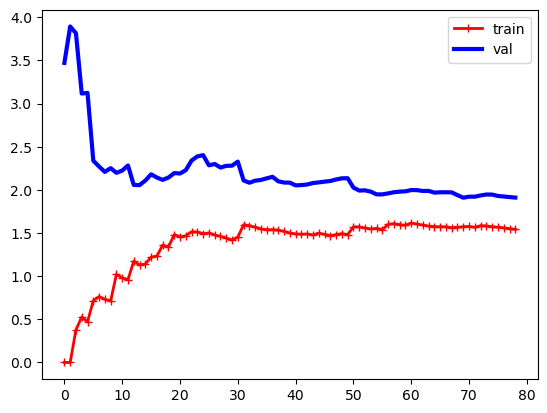

In [62]:
#Let’s look at the learning curves of the plain Linear Regression model:
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.legend();

This deserves a bit of explanation. First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse. Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

These learning curves are typical of an underfitting model. Both curves have reached
a plateau; they are close and fairly high.

    ------------------------- SUGGESTION -----------------------------------

If your model is **underfitting** the training data, adding more training examples will not help. **You need to use a more complex model or come up with better features**.

    ---------------------------------------------------------------------

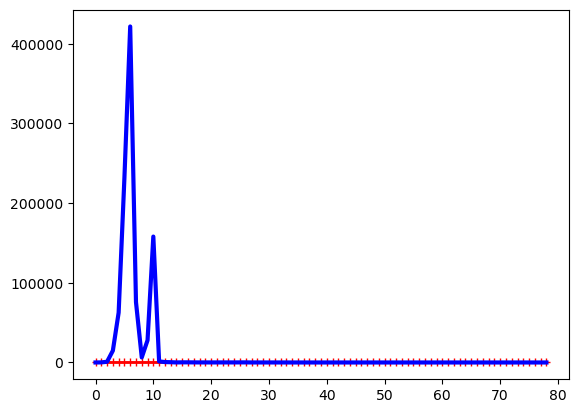

In [64]:
#Now let’s look at the learning curves of a 10th-degree polynomial model on the same data:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

These learning curves look a bit like the previous ones, but there are two very important differences:

• The error on the training data is much lower than with the Linear Regression model.

• There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.


    ------------------------- SUGGESTION -----------------------------------

One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

    ---------------------------------------------------------------------

#### The Bias/Variance Tradeoff

An important theoretical result of statistics and Machine Learning is the fact that a model’s generalization error can be expressed as the sum of three very different errors:
    
**Bias**

> This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

**Variance**

> This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.

**Irreducible error**

>This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff.